**This is a python code for generating channle model with inteference from the simulated received power of single antenna propagation**

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt # import the matplotlib module
from mpl_toolkits.mplot3d import Axes3D # import the 3D plotting toolkit
import math
import csv

filename = 'Tx_1_Power_new.txt'

#define the range of motion and prediction#
x_min = 5
x_max = 46
y_min = -49
y_max = -1     
t = 2058              #define time steps
K_max = 10                #define the maximum number of interferers
trans_ori = (46, -49)                     #define the origin of transmiter

x = [i for i in range(x_min, x_max+1)]    #define x cordinate range of motion and prediction

y = [i for i in range(y_min, y_max+1)]    #define y cordinate range of motion and prediction

x_ori, y_ori = trans_ori


In [12]:
#preprocess the .txt file and return the data matrix

def preprocess(file_name):

    start_line = 14     # Change this to the desired starting line

# Initialize empty lists for each column
    column1 = []
    column2 = []
    column3 = []
    column4 = []

    with open(file_name, 'r') as file:
    # Read and store lines starting from the specified line
        for _ in range(start_line):
            next(file)  # Skip lines until the desired line
        for line in file:
        #data is separated by whitespace, split it into columns
            data = line.split()
        
        #There are four columns, convert each column to the appropriate data type
            col1_value = float(data[0])
            col2_value = float(data[1])
            col3_value = float(data[2])
            col4_value = float(data[3])
        
        # Append the values to their respective columns
            column1.append(col1_value)
            column2.append(col2_value)
            column3.append(col3_value)
            column4.append(col4_value)


# Convert the lists to NumPy arrays and stack them horizontally to create a matrix, ignore column 3, since the hight is always 1.5m
    data_matrix = np.column_stack((column1, column2, column4))
    return data_matrix
# Now, data_matrix contains the dataset as a NumPy array

In [13]:
#generate Interferer propagation
def generate_interferer(num, dataset):
    #number of interferers
    arrays = []
    K = random.randint(1, num) #K in range (1, num)
    #Define a random position of Transmitter
    #interf_pos = [[0 for j in range(2)] for i in range(K)]
    #T = random.randint(0, t-1) #T in range (0, 2057)
    T_interf = [random.randint(0, t-1) for _ in range(K)] #randomly generate K position of interferers
    propagation_map_interf = np.ones((2058,3))
    #result_interf =  [0,0,0,0]
    #result_interf[:] = T_interf[:]//42
    for i in range(K):
        divided_result_interf = T_interf[i]//42
        modulated_result_interf = T_interf[i]%42
        if divided_result_interf % 2 == 1:

            interf_pos = (x_ori-42+modulated_result_interf, y_ori+divided_result_interf)

        else:
    
            interf_pos = (x_ori-modulated_result_interf, y_ori+divided_result_interf)

        
        #print(f"Random interferer {i+1} position: {interf_pos}") 


        #propagation map from the random position of Transmitter
    
        for j in range(t):
            propagation_map_interf[j,:] = dataset[j*t+T_interf[i],:]

        #propagation_map_interf_combined.append(propagation_map_interf)   
    
        # Extract x, y, and z values from the propagation_map
        """
        x_mesh = propagation_map_interf[:, 0]
        y_mesh = propagation_map_interf[:, 1]
        z_mesh = propagation_map_interf[:, 2]
        z_mesh_min = np.min(z_mesh)
        z_mesh_max = np.max(z_mesh) 

        # Create a 3D figure
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Plot the 3D surface
        surface = ax.plot_trisurf(x_mesh, y_mesh, z_mesh, cmap='viridis')

        # Set labels and title
        ax.set_xlabel('X-coordinate')
        ax.set_ylabel('Y-coordinate')
        ax.set_zlabel('Propagation Result')
        ax.set_title(f'3D Surface Plot of Interferer {i+1} Propagation Map')

        # Add color bar
        fig.colorbar(surface)
        # Show the plot
        plt.show()
        """

        new_array = propagation_map_interf
        arrays.append(new_array)

    propagation_map_interf_combined = np.stack(arrays)    
    #print(propagation_map_interf_combined.shape)

#think about which kind of data to be returned

    return  propagation_map_interf_combined, K 

In [ ]:
# Define the propagation area
propagation_area = [(X, Y) for X in range(5, 47) for Y in range(-1, -50, -1)]

# Define the starting point and initialize the route
start_point = (5, -1)
route = [start_point]

# Define a function to get the adjacent points
def get_adjacent_points(point):
    x, y = point
    return [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]

# Iterate through the propagation area and append each point to the route
while len(route) < len(propagation_area):
    last_point = route[-1]
    adjacent_points = get_adjacent_points(last_point)
    for point in adjacent_points:
        if point in propagation_area and point not in route:
            route.append(point)
            break

# Print the route
for point in route:
    print(point)


In [15]:
#calculate the SINR

import math
def calculate_sinr(ps, pi, pn):
    #ps_linear = 10 ** (ps / 10)
    #pi_linear = 10 ** (pi / 10)
    #pn_linear = 10 ** (pn / 10)
    
    #signal= np.sqrt(ps) * np.random.randn(1000)
    #interference = np.sqrt(pi) * np.random.randn(1000)
    #noise = np.sqrt(pn) * np.random.randn(1000)

    #numerator = np.sum(signal ** 2)
    #denominator = np.sum(interference ** 2) + np.sum(noise ** 2)
    #sinr = 10 * math.log10(numerator / denominator)
    sinr = 10 * math.log10(ps/(pi+pn))

    return sinr

In [26]:
def main():

    print("Let's creat an SINR map")
    # get propagation map from the data matix of given time point 

    raw_data = preprocess(filename)

    
    #Define a random position of Transmitter
    #trans_pos = (random.randint(x_min, x_max), random.randint(y_min, y_max))
    #T = random.randint(0, t-1) #T in range (0, 2057)
    T = 1000 

    result = T//42


    if result % 2 == 1:

        trans_pos = (x_ori-42+T%42, y_ori+result)

    else:
    
        trans_pos = (x_ori-T%42, y_ori+result)

    x_pos, y_pos = trans_pos
    print(f"Transmitter position: ({x_pos}, {y_pos})")


    #propagation map from the random position of Transmitter
    propagation_map = np.ones((2058,3))
    for i in range(0, t):
        propagation_map[i,:] = raw_data[i*t+T,:]

    """
    # Extract x, y, and z values from the propagation_map
    x_mesh = propagation_map[:, 0]
    y_mesh = propagation_map[:, 1]
    z_mesh = propagation_map[:, 2]
    z_mesh_min = np.min(z_mesh)
    z_mesh_max = np.max(z_mesh) 

    # Create a 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D surface
    surface = ax.plot_trisurf(x_mesh, y_mesh, z_mesh, cmap='viridis')

    # Set labels and title
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_zlabel('Propagation Result')
    ax.set_title('3D Surface Plot of Transmitter Propagation Map')

    # Add color bar
    fig.colorbar(surface)
    # Show the plot
    plt.show()
    """
    num_rounds = 1000
    SINR = np.zeros((num_rounds, 2058))
    noise_power_linear = 10**(-10)
    #simulate for 1000 times
    for i in range(0, num_rounds):
        k=0
        for position in route:
            #print(f'position is {position}')
            x_ue, y_ue = position
            indices_signal = np.where((propagation_map[:, 0] == x_ue) & (propagation_map[:, 1] == y_ue))
            #print(f'indices_signal are {indices_signal}')
            signal_power = propagation_map[indices_signal[0][0], 2]
            signal_power_linear = 10**(signal_power/10)
            #print(f'signal_power is {signal_power} dBm')
            #print(f'signal_power_linear is {signal_power_linear} mW')

            Interfererence_map, num_interf = generate_interferer(K_max, raw_data)
            # find the indices 
            indices_interf = np.where((Interfererence_map[:, :, 0] == x_ue) & (Interfererence_map[:, :, 1] == y_ue))
            #print(f'indices_interf are {indices_interf}')
            interf_power_linear = 0
            for j in range (0, num_interf):
                interf_power_linear += ((10**((Interfererence_map[indices_interf[0][j], indices_interf[1][j], 2])/10))/100)
            #interf_power_linear = (interf_power_linear/num_interf)/20
            #print(f'interf_power is {interf_power_linear} mW')
            # calculate the SINR            
            SINR[i,k] = calculate_sinr(signal_power_linear, interf_power_linear, noise_power_linear)
            #print(f'SINR is {SINR[i,k]} dB')
            k+=1
    #print(np.max(SINR))
    #print(np.min(SINR))


    # Write SINR to CSV file
    with open('array1000_new_Known_Ant_Pos.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        for row in SINR:
            writer.writerow(row)

if __name__ == "__main__":
    main()    

Let's creat an SINR map
Transmitter position: (38, -26)


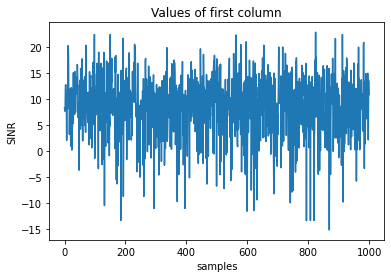

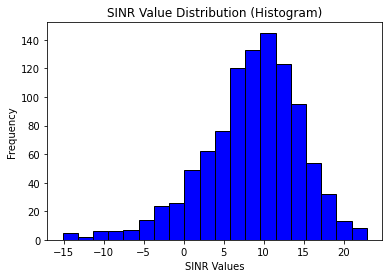

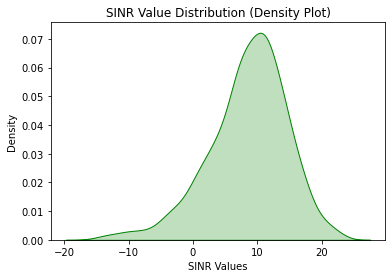

In [33]:
#check the result of the .csv file

import csv
import seaborn as sns

# Read CSV file into array
with open('array1000_new_Known_Ant_Pos.csv', mode='r') as file:
    reader = csv.reader(file)
    arr = np.array(list(reader), dtype=float)

# Get first row of array
first_column = arr[:,500]

#print("First row:", first_row)
# Plot first row
plt.plot(first_column)
plt.xlabel('samples')
plt.ylabel('SINR')
plt.title('Values of first column')
plt.show()

# Create a histogram
plt.hist(first_column, bins=20, color='blue', edgecolor='black')
plt.xlabel('SINR Values')
plt.ylabel('Frequency')
plt.title('SINR Value Distribution (Histogram)')
plt.show()

# Create a density plot
sns.kdeplot(first_column, shade=True, color='green')
plt.xlabel('SINR Values')
plt.ylabel('Density')
plt.title('SINR Value Distribution (Density Plot)')
plt.show()

Estimated Scale Parameter (sigma): 7.649338110460555


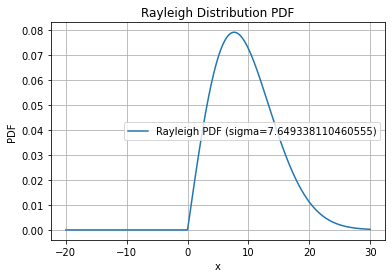

In [52]:
from scipy.stats import rayleigh
from scipy.optimize import minimize

# Assuming you have a dataset as a NumPy ndarray
data = first_column

# Define the negative log-likelihood function for the Rayleigh distribution
def neg_log_likelihood(sigma, data):
    pdf = rayleigh.pdf(data, scale=sigma)
    # Add a small constant to the PDF to avoid taking the log of zero
    epsilon = 1e-10
    pdf = np.maximum(pdf, epsilon)
    return -np.sum(np.log(pdf))
# Initialize the parameter guess
initial_guess = 1.0 

# Use a minimization function to estimate the parameter
result = minimize(neg_log_likelihood, initial_guess, args=(data,))

# Extract the estimated parameter
estimated_sigma = result.x[0]

print(f"Estimated Scale Parameter (sigma): {estimated_sigma}")


x = np.linspace(-20, 30, 1000)  # Adjust the range and number of points as needed

# Calculate the PDF for the given parameter
pdf = rayleigh.pdf(x, scale=estimated_sigma)

# Plot the PDF
plt.plot(x, pdf, label=f'Rayleigh PDF (sigma={estimated_sigma})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.title('Rayleigh Distribution PDF')
plt.grid(True)
plt.show()


Estimated Scale Parameter (sigma): 525.9150137455084
Estimated Non-Central Parameter (m): -516.064759261219


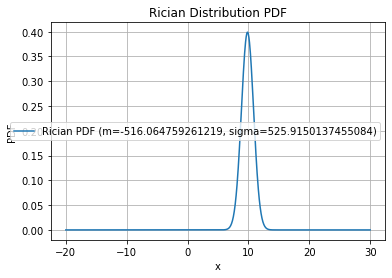

In [56]:
from scipy.stats import rice
#from scipy.optimize import minimize

data = first_column 

# Define the negative log-likelihood function for the Rice distribution
def neg_log_likelihood(params, data):
    m, sigma = params
    pdf = rice.pdf(data, b=sigma, loc=m)
    # Add a small constant to the PDF to avoid taking the log of zero
    epsilon = 1e-10
    pdf = np.maximum(pdf, epsilon)
    return -np.sum(np.log(pdf))


# Initialize the parameter guesses
initial_guess = (1.0, 1.0)  # You can start with any initial guesses

# Use a minimization function to estimate the parameters
result = minimize(neg_log_likelihood, initial_guess, args=(data,))

# Extract the estimated parameters
estimated_m, estimated_sigma = result.x

print(f"Estimated Scale Parameter (sigma): {estimated_sigma}")
print(f"Estimated Non-Central Parameter (m): {estimated_m}")

x = np.linspace(-20, 30, 1000)  # Adjust the range and number of points as needed

# Calculate the PDF for the given parameters
pdf = rice.pdf(x, b=estimated_sigma, loc=estimated_m)

# Plot the PDF
plt.plot(x, pdf, label=f'Rician PDF (m={estimated_m}, sigma={estimated_sigma})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.title('Rician Distribution PDF')
plt.grid(True)
plt.show()

Mean (μ): 8.4924
Standard Deviation (σ): 6.1357


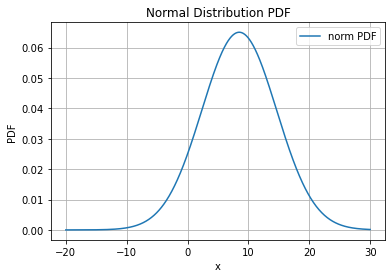

In [58]:
import numpy as np
from scipy.stats import norm

# Sample data (replace this with your actual dataset)
data = first_column

# Estimate the parameters
mu, std = norm.fit(data)

print(f"Mean (μ): {mu:.4f}")
print(f"Standard Deviation (σ): {std:.4f}")

x = np.linspace(-20, 30, 1000)  # Adjust the range and number of points as needed

# Calculate the PDF for the given parameters
pdf = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, pdf, label=f'norm PDF')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.title('Normal Distribution PDF')
plt.grid(True)
plt.show()